# Assignment 2 - Data Analysis and Report

In this project, you will work within a group of five people to write a short analytics report on a product, brand, or personality of your choice. For this project, you can choose to anaylze _any data source_, however, for ease, you should concentrate on a web-based source which you can import and analyze through `pandas`. You can use Twitter, some website or series of website, or some series of websites. You can also choose to use government-produced data, e.g. from [Open Canada](open.canada.ca).

The project is due by beginning of the last class. You will need to turn in the report and the code you used to produce the report in a Jupyter Notebook.

### Specification

The report should be about 1,000-2,000 words long. It should have four sections.

1. Introduction
2. Methods and Data
3. Results
4. Conclusion

In the Introduction, you will be speaking with the voice of the role you are occupying. Why are you undertaking this data analysis? What are the variables you will use? What are the charts, tables, and statistics you will generate? 

In the Methods and Data section, you should include your code and analysis. You should include at least two graphs and at least two tables or data outputs (e.g. DataFrame displays) in the assignment.

Lastly, you should have a Conclusion, which reframes the questions in the Introduction, rehashes the analysis, and then presents next steps forward. You should also discuss other kinds of analysis which could be done to support your initial conclusions.

Your groups are mixed in terms of Python skill and, I hope, academic/professional background. This is typically how teams work in industry and government. There is a division of labour on who does what. Not everyone needs to write code, but I _still expect that everyone in the group understand and be able to describe what the code does_. 

In addition to turning in a zipped folder with your IPython Notebook and your data, each people in the group needs to write a short (200 words or less) description of what the code does in detail and what your responsibilities in producing the report were. Attach it as a text or a Microsoft Word file.

### Short example (yours will be longer)

**Introduction**

Apple, Microsoft, and Facebook are popular technology companies. It may be the case that we could predict [how well the company is doing from Twitter posts](https://www.sciencedirect.com/science/article/pii/S187775031100007X).

**Methods and Data**

To look into this, we collected a small sample of data on each of these companies. We wanted to compare how much attention each of them got.

In [22]:
import json
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
## ... code which collects Twitter data goes here ...

In [38]:
tweets = []
file_data = open('data/companies.json', 'r').read().split('\n')

for line in file_data:
    try:
        tweet = json.loads(line)
        tweets.append(tweet)
    except:
        pass
df_tweets = pd.DataFrame(tweets)

In [39]:
results   = []
companies = ['apple', 'microsoft', 'facebook']
for company in companies:
    df_tweets[company] = df_tweets['text'].str.contains(company, re.IGNORECASE)
    results.append( (company, df_tweets[company].sum()) )
df_results = pd.DataFrame(results, columns =['Company', 'Mentions'], index = companies)

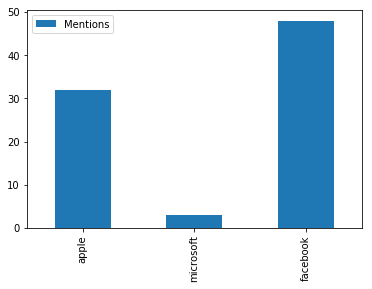

In [40]:
df_results.plot.bar()

We also looked at how some of these companies were mentioned in the tweets.

In [30]:
df_apple = df_tweets[df_tweets['apple']]
df_ms    = df_tweets[df_tweets['microsoft']]
df_fb    = df_tweets[df_tweets['facebook']]

In [34]:
df_apple['text'].values[0:5]

array([ 'RT @nakedjuice: Start your day off with a mighty blend of orange, apple, cucumber, spinach, celery and a pinch of ginger. https://t.co/SG1P…',
       'Toetsenbord iPhone 6S niet nauwkeurig - One More Thing https://t.co/5WWmKyFMuW #apple #iphone',
       '&amp; now he’s watching me eat my damn apple😒\U0001f928 ughhhh! https://t.co/swqghG0XIc',
       'RT @WillTheHeat: @Drinkchamps we apple users finally got the infamous GIF https://t.co/qM2ILKIoXy',
       'RT @zellie_bride: apple really played me by updating snapchat even after I turned off automatic updates'], dtype=object)

In [35]:
df_ms['text'].values[0:5]

array([ '@jomjamminiblog แล้วจะแบ่งยังไงถ้าคนเล่นทั้งทวิตเฟซใช้ microsoft samsung apple มีทั้งเสื้อผ้าร้านมุมทองและนิสิต คนแ… https://t.co/4NUurFuMwq',
       'Access 7,000 Professional #PowerPoint #Slides with @SlideModel https://t.co/zJLJBfs6nE #speaking #presentations #microsoft',
       '@dannybenning3 @esm_gill Mind sending me an email? Would love to help out. Piboggan@microsoft.com',
       'The latest The Cloud Central! https://t.co/CjMjJE0OdE Thanks to @mjoseff @Cloud_Security1 @cloudficient #microsoft',
       'Access 7,000 Professional #PowerPoint #Slides with SlideModel https://t.co/0OvUNzGJXB #speaking #presentations #microsoft zacjohnson'], dtype=object)

In [36]:
df_fb['text'].values[0:5]

array([ "RT @meteoagres: Predicció especial de l'episodi a la meua pàgina del facebook.\nDeixe l'enllaç: https://t.co/HMe3NAbnvv https://t.co/BBga9kj…",
       '無料■facebook＆twitter&amp;アメーバなう\u3000告知力アップの連携技\nhttps://t.co/LZuqFylm7o',
       "Check out Snore No More and Sleep Solutions LLC's facebook post https://t.co/LdzKIQbrCp via @",
       "RT @danozzi: you're a punk dude over 30 choose your path:\n\n⚪️ crossfit\n⚪️ barbershop culture\n⚪️ craft beer\n⚪️ mma\n⚪️ facebook rants\n⚪️ enam…",
       "RT @novicinema: etkinliklerimizden ve paylaştığımız yazılardan anında haberdar olmak istiyorsanız, novicinema'yı  facebook üzerinden de tak…"], dtype=object)

**Results**

Based on our analysis, Facebook is being mentioned most in our Twitter sample, followed by Apple, then by Microsoft. However, in reading the tweets, we found that Apple mentions are often discussing the fruit. Microsoft mentions talk more about slides and communication with people in the company. Facebook mentions talk about related Facebook posts.

**Conclusion**

We set out to find which company was the most popular. We used tweets we collected to get a sense of this. We found that Facebook was being tweeted most. However, many people were discussing other posts online. It may be the case that companies are being tweeted about, but it is not the case that people are discussing anything in particular about the companies themselves.